In [ ]:
# ----------------------------------------------------------------------------
# Title: Assignment 6.2
# Author: Surenther Selvaraj
# Date: 19 Oct 2025
# Modified By: Surenther Selvaraj
# Description: Term Project Milestone 1: Data Selection and EDA
# Data: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
# ----------------------------------------------------------------------------

In [5]:
# --- Importing Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Project Narrative: Business Problem and Model Target

The original business problem is now refocused on optimizing marketing spend for a consumer retail company whose data is provided in the Kaggle Customer Personality Analysis Dataset. The company frequently runs direct marketing campaigns (e.g., promotional emails, mailers, or catalog offers) but faces two main challenges: a low overall campaign acceptance rate and high associated mailing/contact costs. This leads to inefficient resource allocation and poor Return on Investment (ROI) for marketing efforts.

The core problem is the lack of a predictive targeting model to filter the customer base and identify which individuals are most likely to accept the new offer before the campaign is launched. Currently, campaigns are deployed broadly, wasting resources on customers who are unlikely to convert.

The business solution is to build a classification model that calculates a propensity-to-purchase score for each customer. This score will allow the marketing team to target only the top 10% or 20% of customers most likely to respond, drastically lowering the contact volume while maintaining or even increasing the absolute number of campaign acceptances, thereby maximizing ROI.

The Target for the Model:
The model's target variable will be Response, a binary outcome (1 = Accepted the last campaign offer, 0 = Did not accept). This is a classic classification problem. The final model will predict $P(\text{Response}=1)$ using customer demographics, past spending habits, and previous campaign success metrics. This real-world application provides a tangible business benefit by directly improving marketing efficiency.

## Data Selection and Initial EDA

### Data Source
The analysis uses a real-world dataset sourced from Kaggle: Customer Personality Analysis. This dataset contains information on customer demographics, product spending (e.g., on wines, fruits, meat), and prior marketing campaign responses for a retail company.

### Key Variables
| Variable  | Type  |  Description |
|---|---|---|
| Income  | Numerical  | Customer's yearly household income.  |
| Recency  | Numerical  | Number of days since the customer’s last purchase (low = high engagement).  |
| MntWines   | Numerical  | Amount spent on wine in the last 2 years (a proxy for total high-value spending).   |
| Education  | Categorical  | Customer's education level (e.g., Graduation, PhD, Master).   |
| NumWebPurchases  | Numerical  | Number of purchases made through the company's website.   |
| Response  | Binary (Target)  | 1 if the customer accepted the last campaign offer, 0 otherwise.  |

In [3]:
# --- Load and Prepare Data ---
try:
    df = pd.read_csv('marketing_campaign.csv', sep='\t')
except FileNotFoundError:
    print("Error: marketing_campaign.csv not found. Please ensure the file is in the correct directory.")
    exit()

# Handle Missing Income values
# Dropping NaNs for initial modeling simplicity, though imputation could be an option later.
df.dropna(subset=['Income'], inplace=True)

# Calculate Age
current_year = 2025
df['Age'] = current_year - df['Year_Birth']

# Calculate Total Spending for future feature use
df['Total_Mnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                  df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Set Matplotlib style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Graph 1: Distribution of the Target Variable (Response Rate)
Description: This bar chart displays the overall proportion of customers who accepted the last campaign offer versus those who did not.

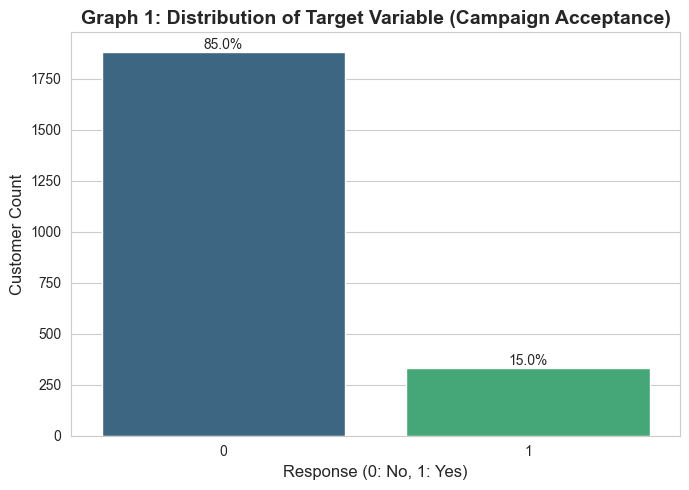

In [6]:
# --- Graph 1: Distribution of the Target Variable (Response Rate) ---
plt.figure(figsize=(7, 5))
ax1 = sns.countplot(x='Response', data=df, palette='viridis')
ax1.set_title('Graph 1: Distribution of Target Variable (Campaign Acceptance)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Response (0: No, 1: Yes)', fontsize=12)
ax1.set_ylabel('Customer Count', fontsize=12)
total = len(df)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Analysis: <br> This bar chart visualizes the class distribution of the target variable, Campaign Acceptance (Response), clearly highlighting a severe class imbalance typical of direct marketing. The vast majority of customers, 85.0% (Response=0), did not accept the offer, while only 15.0% (Response=1) converted. This extremely low baseline acceptance rate confirms the business need to improve targeting efficiency and highlights a critical modeling challenge, as future classification models must account for this imbalance (e.g., using specific metrics or sampling techniques) to avoid simply predicting the majority class.

### Graph 2: Campaign Acceptance by Education Level
Description: This visualization compares the percentage of customers who accepted the campaign offer across different education levels (e.g., Basic, Graduation, Master, PhD).

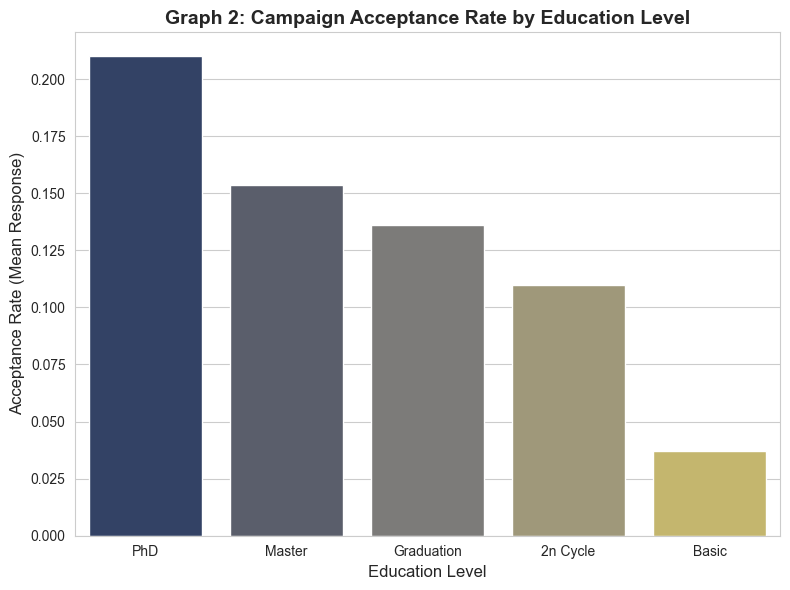

In [7]:
# --- Graph 2: Campaign Acceptance by Education Level ---
education_acceptance = df.groupby('Education')['Response'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
ax2 = sns.barplot(x='Education', y='Response', data=education_acceptance, palette='cividis')
ax2.set_title('Graph 2: Campaign Acceptance Rate by Education Level', fontsize=14, fontweight='bold')
ax2.set_xlabel('Education Level', fontsize=12)
ax2.set_ylabel('Acceptance Rate (Mean Response)', fontsize=12)
plt.tight_layout()
plt.show()

Analysis: <br> This bar chart, clearly shows a strong positive correlation between higher levels of education and the likelihood of accepting the campaign offer . Customers with a PhD are the most responsive segment, with an acceptance rate exceeding 20%, followed by Master's and Graduation levels. In contrast, response rates decline consistently across the 2n Cycle and Basic education groups, with the latter having the lowest acceptance rate, falling below 5%. This finding is critical because it establishes Education as a powerful demographic predictor, suggesting the company's products or offers resonate most strongly with highly-educated segments, which should be heavily prioritized in future marketing efforts.



### Graph 3: Engagement vs. Acceptance
Description: This plot compares the distribution of Recency (days since last purchase) for customers who accepted the offer versus those who did not, using a Kernel Density Estimate (KDE).

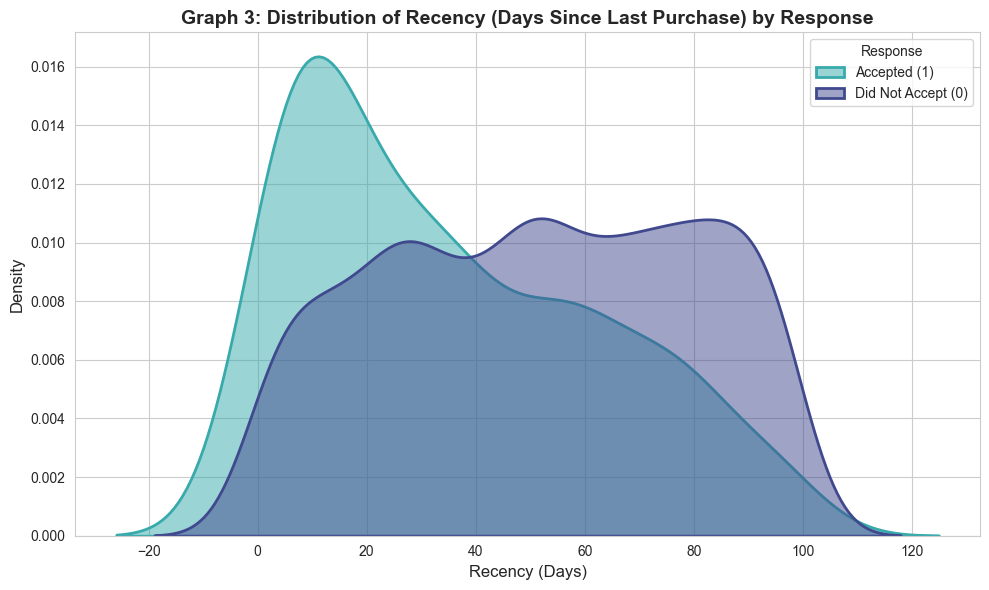

In [8]:
# --- Graph 3: Engagement vs. Acceptance (Recency in Days) ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Recency', hue='Response', fill=True, common_norm=False, palette='mako', alpha=.5, linewidth=2)
plt.title('Graph 3: Distribution of Recency (Days Since Last Purchase) by Response', fontsize=14, fontweight='bold')
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Response', labels=['Accepted (1)', 'Did Not Accept (0)'])
plt.tight_layout()
plt.show()

Analysis: <br> This KDE plot, compares the purchase activity of customers based on their campaign acceptance . The distribution for the 'Accepted (1)' group (light teal) is heavily concentrated at low Recency values, showing a sharp peak around 15 days, which signifies that customers who convert are highly engaged and have made a purchase very recently. In contrast, the distribution for the 'Did Not Accept (0)' group (dark blue) is much flatter and broader, spreading across all recency bins up to 100 days. This clearly demonstrates that recent customer activity is the strongest single predictor of campaign success, providing a clear opportunity for the model to exclude long-inactive customers from future, costly campaigns to boost efficiency.

### Graph 4: Income vs. Spending
Description: A scatter plot showing the relationship between a customer's Income and their MntWines spending over two years, with points colored by their campaign Response status.

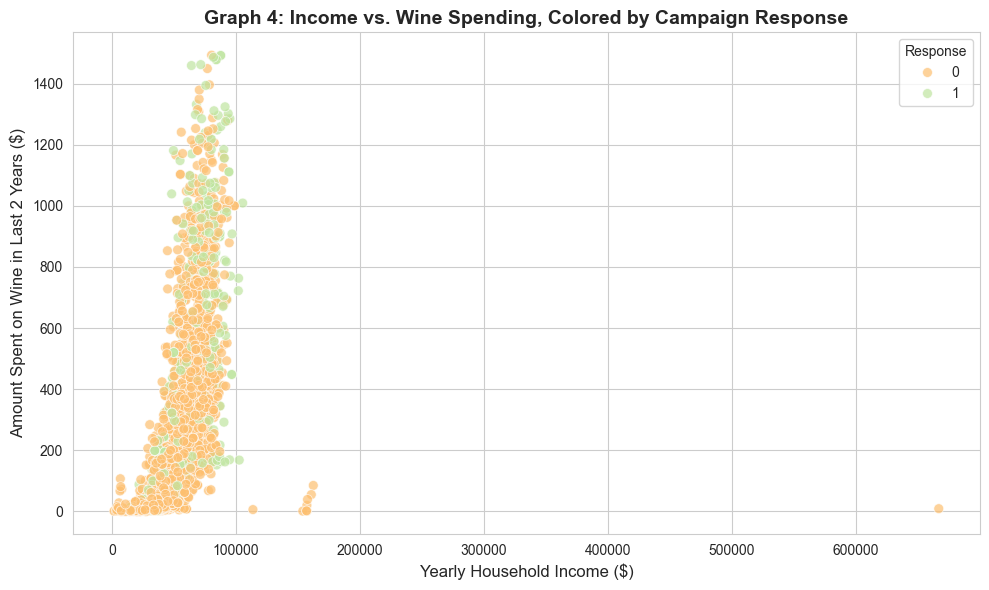

In [9]:
# --- Graph 4: Income vs. Spending (MntWines) ---
plt.figure(figsize=(10, 6))
ax4 = sns.scatterplot(x='Income', y='MntWines', hue='Response', data=df, palette='Spectral', alpha=0.7, s=50)
ax4.set_title('Graph 4: Income vs. Wine Spending, Colored by Campaign Response', fontsize=14, fontweight='bold')
ax4.set_xlabel('Yearly Household Income ($)', fontsize=12)
ax4.set_ylabel('Amount Spent on Wine in Last 2 Years ($)', fontsize=12)
plt.tight_layout()
plt.show()

Analysis: <br> The scatter plot, visualizes the intersection of two critical features: income and past high-value spending . This analysis clearly shows that successful conversions (Response=1) are overwhelmingly clustered in the high-income (specifically the $50k–$100k range) and high-spending segment (where MntWines is high). The majority of data points, particularly those with low spending, are non-responders, confirming that the current offering is exclusively appealing to high-value, premium customers. This reinforces the need for the predictive model to focus narrowly on these top-tier segments to ensure the marketing spend is directed toward the most profitable audience.